#### The following imports must be made to run any code below

In [93]:
import timeit
from random import sample
import random
import matplotlib.pyplot as plt
from timeit import timeit
import numpy as np
from sortedcontainers import SortedDict
from collections import OrderedDict
from threading import Thread

### Hypothesis

I assume that SortedDict will perform worse than OrderedDict overall because SortedDict has an O(log(n)) insertion time due to using a sorted list while OrderedDict has an O(1) insertion time due to using a hashmap.

### Methods

To generate the sorting times I created a with 100,000 unique randomized values from 0 to 200,000 using the random library with a constant seed. Using a seed will create the same randomized list across all testing instances. The code will go over each value in the randomized_keys list and add it to each dictionary and calculate the run time of that operation.

### Code to Generate the insertion Data

In [94]:
random.seed(331)

sortedDict = SortedDict()
orderedDict = OrderedDict()

sorted_times = []
ordered_times = []
randomized_keys = random.sample(range(0, 200_000), 100_000)

In [95]:
for key in randomized_keys:
    sorted_times.append(
        timeit('sortedDict[key] = True',
           number=1, globals=globals()))

In [96]:
for key in randomized_keys:
    ordered_times.append(
        timeit('orderedDict[key] = True',
           number=1, globals=globals()))

### Code to plot the insertion times
#### This graph has been cut off at y = 0.00005 seconds to increase readability

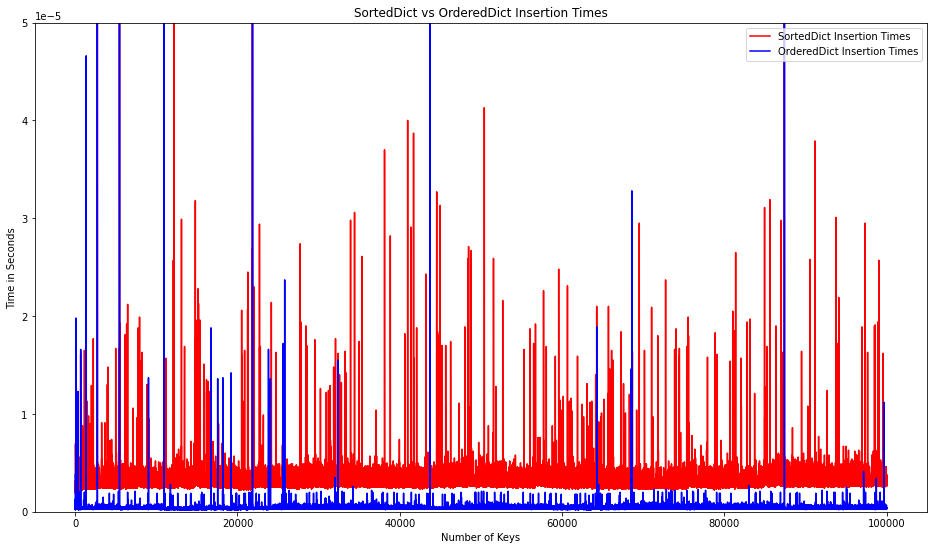

In [97]:

plt.plot([i+1 for i in range(len(sorted_times))],
        sorted_times,
        label="SortedDict Insertion Times",
        color="red")


plt.plot([i+1 for i in range(len(ordered_times))],
        ordered_times,
        label="OrderedDict Insertion Times",
        color="blue")

plt.legend()
#plt.xticks(np.arange(0, len(sorted_times)+1, 2))
plt.ylim(0,0.00005)
plt.title("SortedDict vs OrderedDict Insertion Times")
plt.ylabel("Time in Seconds")
plt.xlabel("Number of Keys")
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

### Code to plot the insertion times
#### This graph has not been cut off, but is less readable than the one above

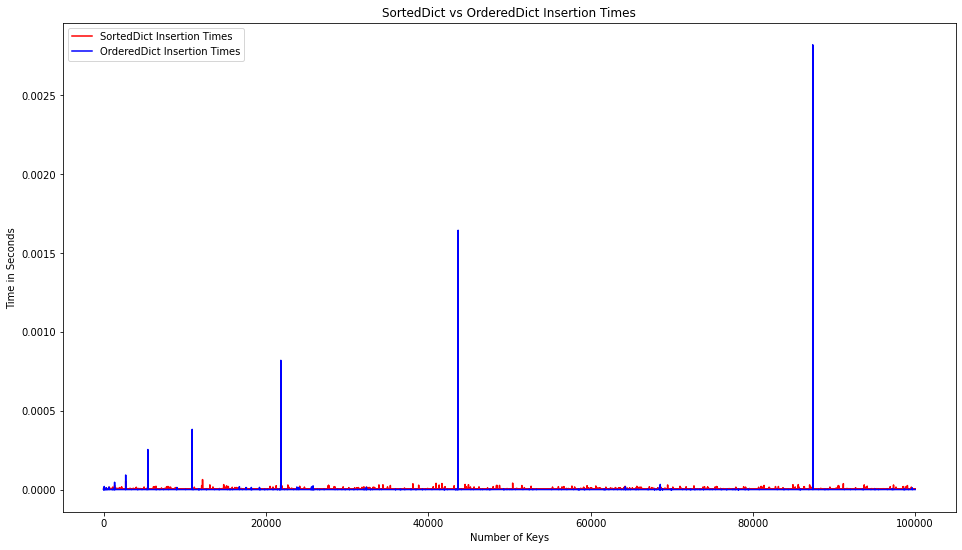

In [98]:

plt.plot([i+1 for i in range(len(sorted_times))],
        sorted_times,
        label="SortedDict Insertion Times",
        color="red")


plt.plot([i+1 for i in range(len(ordered_times))],
        ordered_times,
        label="OrderedDict Insertion Times",
        color="blue")

plt.legend()
plt.title("SortedDict vs OrderedDict Insertion Times")
plt.ylabel("Time in Seconds")
plt.xlabel("Number of Keys")
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

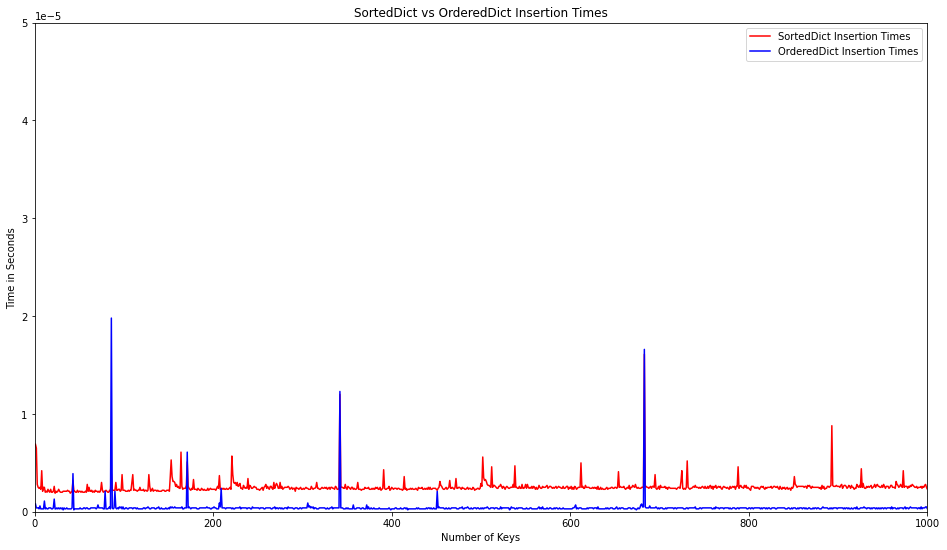

In [99]:

plt.plot([i+1 for i in range(len(sorted_times))],
        sorted_times,
        label="SortedDict Insertion Times",
        color="red")


plt.plot([i+1 for i in range(len(ordered_times))],
        ordered_times,
        label="OrderedDict Insertion Times",
        color="blue")

plt.legend()
#plt.xticks(np.arange(0, len(sorted_times)+1, 2))
plt.ylim(0,0.00005)
plt.xlim(0,1000)
plt.title("SortedDict vs OrderedDict Insertion Times")
plt.ylabel("Time in Seconds")
plt.xlabel("Number of Keys")
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

### Results

Given the plots above, we observe that the OrderedDict performs faster insertions given a random unique input, but has instances of single insertions taking significanly longer. SortedDict has a relatively consistent peaks, but still performs worse than OrderedDict.

### Discussion

I was surprised by the outcome, as I didn't think there would be any instance where an insertion into OrderedDict would be slower than SortedDict. This could be due to looking thing up in memory, multiple hashing functions being used, or allocating more memory. I found no unexpected challenges when collecting data, other than how to display all the data in a readble graph. My solution was to just use more graphs to show different bounds. As expected most of the OrderedDict insertions were faster than SortedDict insertions because of OrderedDict using a hashmap to store values while SortedDict uses a sorted list.

### Conclusions

Under the conditions tested, OrderedDict generally produces a faster insertion than SortedDict while inserting 100,000 randomized values.